In [1]:
import pandas as pd

- 시간 데이터 처리가 실무에서 매우 중요하다.
- 일별, 주별, 분기별 성과지표 관리하는게 매우 중요하다.
- Work Week

In [3]:
df1 = pd.read_csv("03_Delivery.csv", encoding="cp949")

In [4]:
df1.head()

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231


날짜 데이터
- 배송시작일
- 배송완료일
- 주문일
이 있다. 형식이 제각각이다.

In [5]:
# dtype: int64
df1["주문일"]

0        20181227
1        20181229
2        20181230
3        20181231
4        20181231
           ...   
46744    20171229
46745    20171229
46746    20171230
46747    20171231
46748    20171231
Name: 주문일, Length: 46749, dtype: int64

In [7]:
# pandas 날짜 데이터 타입으로 바꿔서 주차, 일, 월별로 데이터를 뽑아서 분석해보자.
pd.to_datetime(df1["주문일"])
# dtype: datetime64[ns]
# 하이픈 같은 기호가 없으면 초(second)라고 인식해서 위와 같이 변환된거다.
# 그래서 77년부터 된 것
# 제대로 바뀌지 않았다.

0       1970-01-01 00:00:00.020181227
1       1970-01-01 00:00:00.020181229
2       1970-01-01 00:00:00.020181230
3       1970-01-01 00:00:00.020181231
4       1970-01-01 00:00:00.020181231
                     ...             
46744   1970-01-01 00:00:00.020171229
46745   1970-01-01 00:00:00.020171229
46746   1970-01-01 00:00:00.020171230
46747   1970-01-01 00:00:00.020171231
46748   1970-01-01 00:00:00.020171231
Name: 주문일, Length: 46749, dtype: datetime64[ns]

In [8]:
# 날자 데이터를 정상적으로 바꾸기 위해서는 
# format 을 지정한다.
pd.to_datetime(df1["주문일"], format="%Y%m%d")
# 정상적으로 바뀌었다.

0       2018-12-27
1       2018-12-29
2       2018-12-30
3       2018-12-31
4       2018-12-31
           ...    
46744   2017-12-29
46745   2017-12-29
46746   2017-12-30
46747   2017-12-31
46748   2017-12-31
Name: 주문일, Length: 46749, dtype: datetime64[ns]

In [9]:
df1["주문일(datetime)"] = pd.to_datetime(df1["주문일"], format="%Y%m%d")

In [11]:
# datetime 형태를 분석해서 여러 insight를 찾아보자.
df1.head()

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,주문일(datetime)
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227,2018-12-27
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229,2018-12-29
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230,2018-12-30
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231,2018-12-31
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231,2018-12-31


In [40]:
# 이제 일자별 물품 주문량을 확인해보자.
df1.pivot_table(index="주문일(datetime)", values="수량")
# 주문일자별로 물품 주문량 평균이 계산되서 나온다.

,수량
주문일(datetime),
2017-01-01,1.000000
2017-01-15,1.000000
2017-01-18,1.000000
2017-01-23,1.000000
2017-02-02,1.000000
...,...
2019-05-31,1.189189
2019-06-01,1.000000
2019-06-02,1.250000


In [14]:
# 우리는 평균 주문량이 아니라 합을 알고 싶다.
# aggfunc : aggregation function
# 주문일자별 총합이 계산되서 나온다.
df1.pivot_table(index="주문일(datetime)", values="수량", aggfunc="sum")

# 이를 사용하면 주문일별로
# 주문량, 판매량을 알 수 있다.
# 즉, 전체적인 추이를 확인할 수 있다. 
# 물품의 판매 추이

,수량
주문일(datetime),
2017-01-01,1
2017-01-15,1
2017-01-18,1
2017-01-23,1
2017-02-02,1
...,...
2019-05-31,88
2019-06-01,1
2019-06-02,5


In [15]:
# 주문일자로부터 연도만 추출해오기
df1["주문일(datetime)"].dt.year

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
46744    2017
46745    2017
46746    2017
46747    2017
46748    2017
Name: 주문일(datetime), Length: 46749, dtype: int64

In [17]:
df1["주문연도"] = df1["주문일(datetime)"].dt.year

In [18]:
df1

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,주문일(datetime),주문연도
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227,2018-12-27,2018
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229,2018-12-29,2018
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230,2018-12-30,2018
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231,2018-12-31,2018
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231,2018-12-31,2018
...,...,...,...,...,...,...,...,...,...,...,...
46744,카드,D-20171229-0000036-00,2017-12-29 오후 4:32,2018-01-02 오전 5:31,52800,445.0,1,모바일웹,20171229,2017-12-29,2017
46745,카드,D-20171229-0000043-00,2018-01-03 오전 9:45,2018-01-07 오전 5:38,112200,172.0,2,모바일웹,20171229,2017-12-29,2017
46746,카드,D-20171230-0000022-01,2018-01-02 오후 7:06,2018-01-11 오전 2:46,36000,140.0,1,네이버 페이,20171230,2017-12-30,2017
46747,카드,D-20171231-0000017-01,2018-01-03 오후 2:00,2018-01-06 오후 6:06,73460,184.0,1,네이버 페이,20171231,2017-12-31,2017


In [26]:
# 이제 우리는 주문연도별로
# 판매량, 주문량을 확인할 수 있다.
df1["주문월"] = df1["주문일(datetime)"].dt.month
# 1년 52주 중 몇주차에 주문이 되었는가?를 분석할 수 있다.
# 2018-12-31의 주문주차가 1이다 : 19년도의 1주차이다.
df1["주문주차"] = df1["주문일(datetime)"].dt.isocalendar().week

# day of week 요일을 계산하는 함수
df1["주문요일"] = df1["주문일(datetime)"].dt.day_name()


# 여기서 뽑은 시간 데이터를 사용해서
# 어떤 요일에 가장 많이 팔렸고
# 몇주차에 판매량 추이가 가장 높고
# 몇월에 상품구매금액(매출액)이 가장 높은지
# 를 분석할 수 있다.

In [27]:
df1

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,주문일(datetime),주문연도,주문월,주문주차,주문요일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227,2018-12-27,2018,12,52,Thursday
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229,2018-12-29,2018,12,52,Saturday
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230,2018-12-30,2018,12,52,Sunday
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231,2018-12-31,2018,12,1,Monday
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231,2018-12-31,2018,12,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46744,카드,D-20171229-0000036-00,2017-12-29 오후 4:32,2018-01-02 오전 5:31,52800,445.0,1,모바일웹,20171229,2017-12-29,2017,12,52,Friday
46745,카드,D-20171229-0000043-00,2018-01-03 오전 9:45,2018-01-07 오전 5:38,112200,172.0,2,모바일웹,20171229,2017-12-29,2017,12,52,Friday
46746,카드,D-20171230-0000022-01,2018-01-02 오후 7:06,2018-01-11 오전 2:46,36000,140.0,1,네이버 페이,20171230,2017-12-30,2017,12,52,Saturday
46747,카드,D-20171231-0000017-01,2018-01-03 오후 2:00,2018-01-06 오후 6:06,73460,184.0,1,네이버 페이,20171231,2017-12-31,2017,12,52,Sunday


In [29]:
import seaborn as sns
import matplotlib as mpl
# 맑은 고딕 font를 설정해주는 함수 : 한글 글꼴 설정
mpl.rc("font", family="Malgun Gothic")

<Axes: xlabel='주문요일', ylabel='count'>

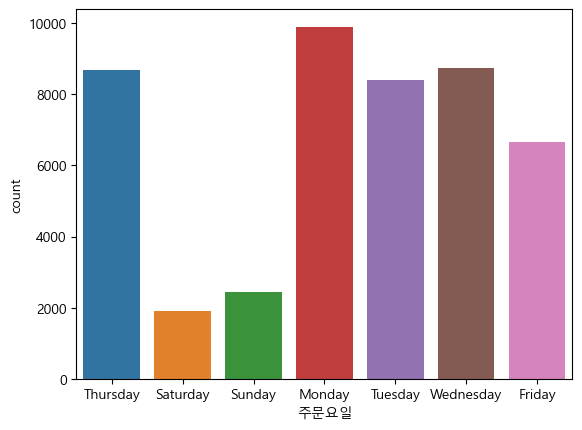

In [30]:
# 날짜 데이터 시각화
# 요일별로 얼마나 주문이 됬는가?
sns.countplot(data=df1, x="주문요일")
# 주중 주문량이 크다. 
# 주말 주문량이 적다.
# 주중, 주말 판매 추이가 다르다.

<Axes: xlabel='주문일(datetime)', ylabel='상품구매금액'>

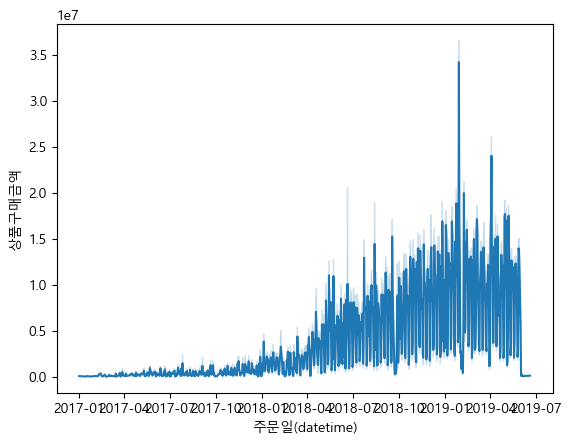

In [31]:
# 주문일자별 상품구매금액의 총합이 계산되서 lineplot
sns.lineplot(data=df1, x="주문일(datetime)", y="상품구매금액", estimator=sum)
# 시간이 흐르면 흐를 수록, 상품구매금액의 총량이 점점 올라가는 걸 볼 수 있다.
# 추이가 왔다 갔다 하면서 올라가고 있다.

In [32]:
# 위 두가지 같은게, 실무에서 분석할 때 매우 유용하다.
# 시간에 따라서 주요 지표가 달라지는 것들.

- Mission
일자 별 주문 수량을 계산한 Table에서 정렬을 이용해(Sort_values) 가장 많이 주문이 들어온 일자를 확인해 보세요!

In [47]:
df1.pivot_table(index="주문일(datetime)", values="수량", aggfunc="sum").sort_values(by="수량", ascending=False).head()

,수량
주문일(datetime),
2019-01-28,442
2019-04-03,417
2019-04-02,298
2018-11-12,295
2019-05-07,287
